In [2]:
import numpy as np
import matplotlib.pyplot as plt
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada_petals.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC

## Hazard 

<GeoAxesSubplot:title={'center':'RF max intensity at each point'}>

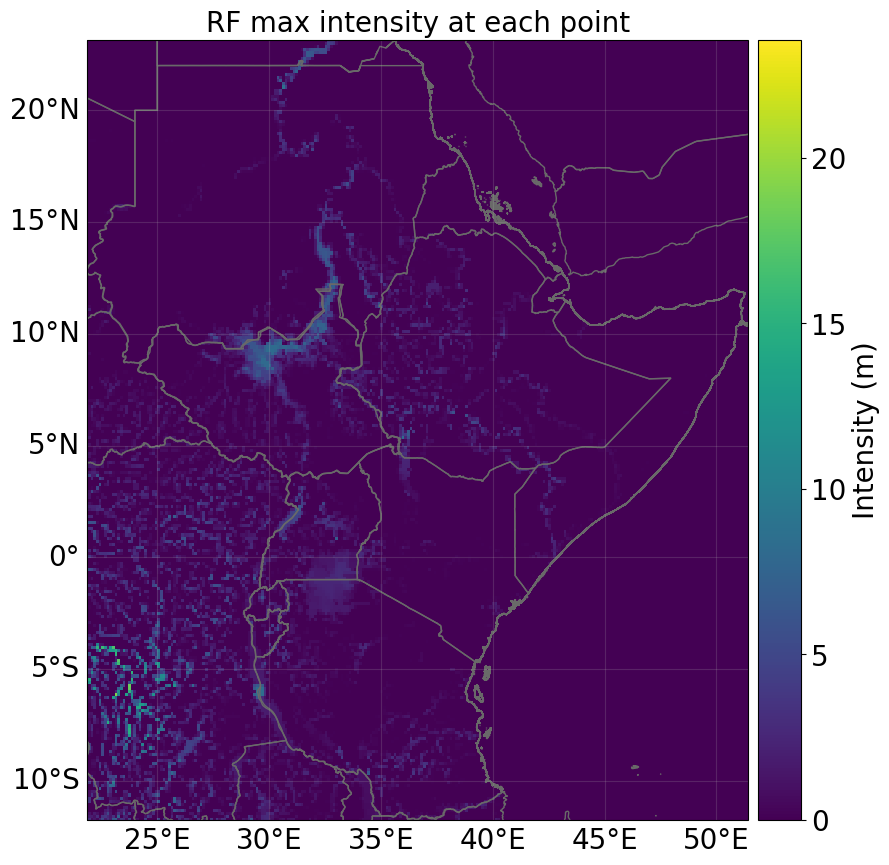

In [3]:
#21.838949 	-11.745695 	51.415695 	23.145147
min_lat, max_lat, min_lon, max_lon = -11.745695 , 23.145147, 21.838949, 51.415695
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)

years = [2020]

flddph_path='/home/flood_data/flddph_150arcsec_clm45_gfdl-esm2m_0.nc'

fldfrc_path='/home/flood_data/fldfrc_150arcsec_clm45_gfdl-esm2m_0.nc'

rf_rast = RiverFlood.from_nc(years=years,dph_path=flddph_path,origin=True, frc_path=fldfrc_path,
                             centroids=cent, ISINatIDGrid=False)
                    #centroids=cent, ISINatIDGrid=False)
rf_rast.plot_intensity(event=0)

# impact function 

<AxesSubplot:title={'center':'RF 6: Flood South America JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

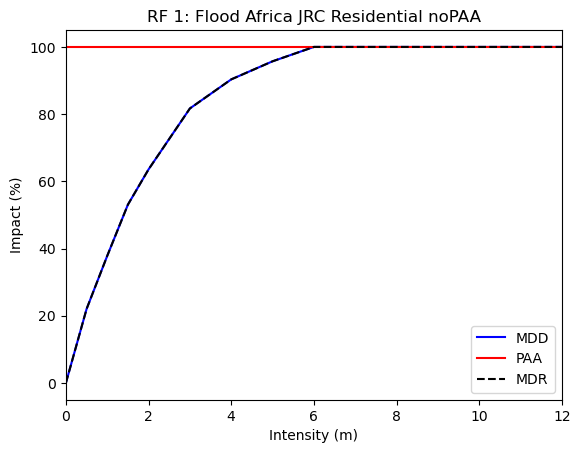

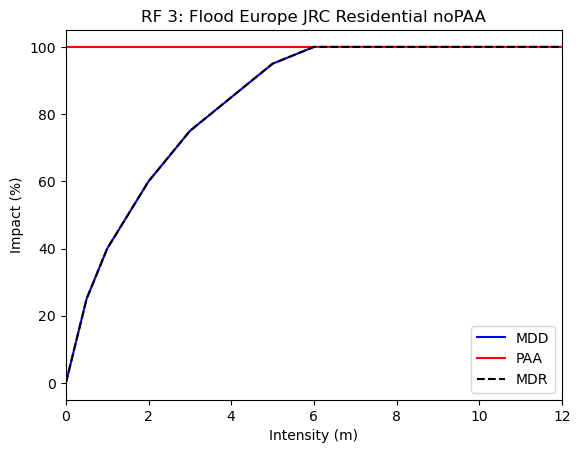

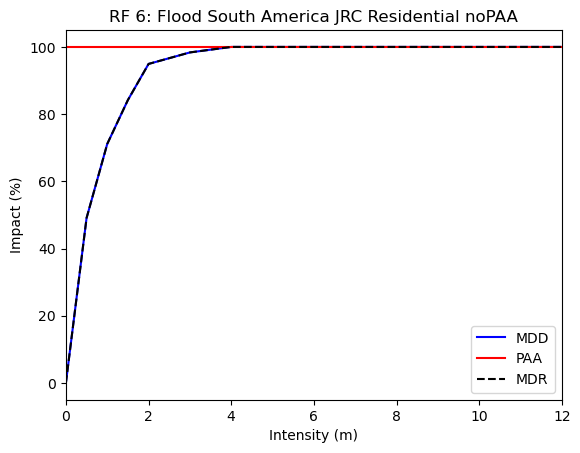

In [4]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_AFR = impf_set.get_func(fun_id=1)
impf_AFR[0].plot()
impf_EUR = impf_set.get_func(fun_id=3)
impf_EUR[0].plot()
impf_OCE = impf_set.get_func(fun_id=6)
impf_OCE[0].plot()

## Exposure data 

In [7]:
from climada.entity import Exposures
import pandas as pd

file_path='/home/flood_data/LitPop_pc_2021_30arcsec_EA.csv'


#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
ea_exp = Exposures(pd.read_csv(file_path))
ea_exp.check()

## Impact calculation 

2022-09-22 04:02:53,987 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

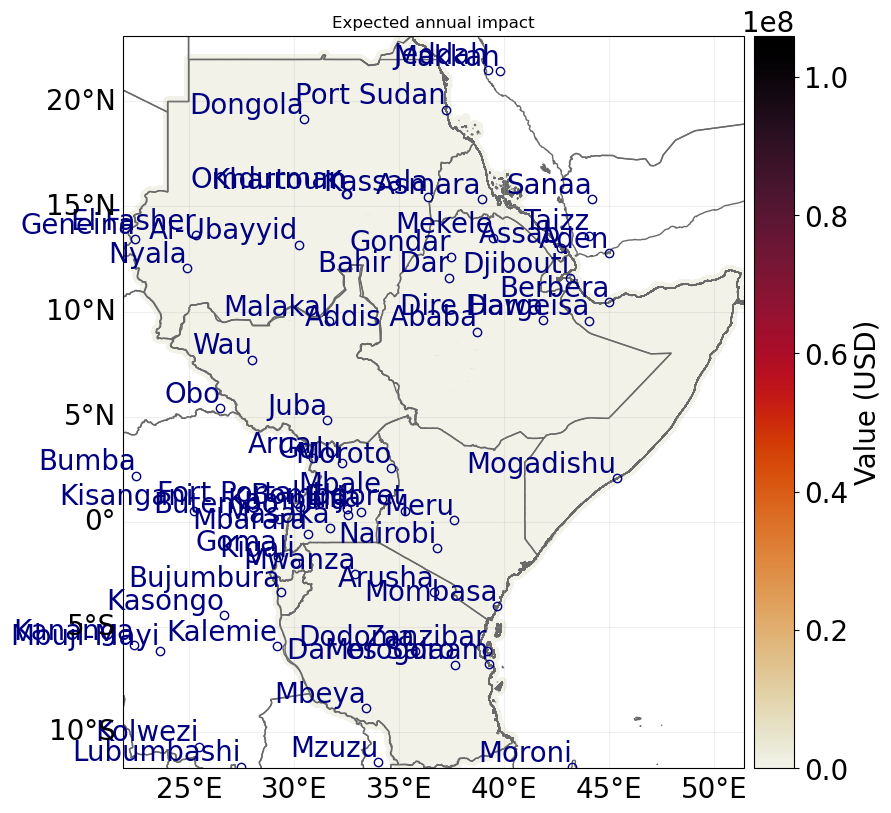

In [10]:
from climada.engine import Impact

imp=Impact()
imp.calc(ea_exp, impf_set,rf_rast,save_mat=False)
#rf.plot_intensity(0)
imp.plot_scatter_eai_exposure()